In [1]:
# !pip install KMeans

In [2]:
# %matplotlib inline
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

In [3]:
GLU_PCA = pd.read_table ('GLU_mut_project_onto_evecs.dat', sep = '\\s+') 
WT_PCA = pd.read_table('VCBC_A3F_project_onto_evecs.dat', sep = '\\s+') 
pdb_PCA = pd.read_table ('/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/analysis/PCA/pdb_project_onto_evecs.dat', sep = '\\s+')

In [4]:
# GLU_PCA

In [5]:
# GLU_PCA.shape

In [6]:
# WT_PCA

In [7]:
pdb_PCA

,#Frame,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9,Mode10
0,1,27.137,51.608,-20.138,-14.312,-19.914,2.557,-7.996,-9.435,10.762,-33.338


In [8]:
GLU_PCA['source'] = 'GLU_PCA'
WT_PCA['source'] = 'WT_PCA'

In [9]:
combined_df = pd.concat([GLU_PCA, WT_PCA], axis=0)

In [10]:
# combined_df

In [11]:
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
mms = MinMaxScaler()
mms.fit(combined_df[['Mode1', 'Mode2', 'Mode3', 'Mode4']])
combined_df_transformed = mms.transform(combined_df[['Mode1', 'Mode2', 'Mode3', 'Mode4']])

# print(combined_df_transformed)

In [12]:
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(combined_df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

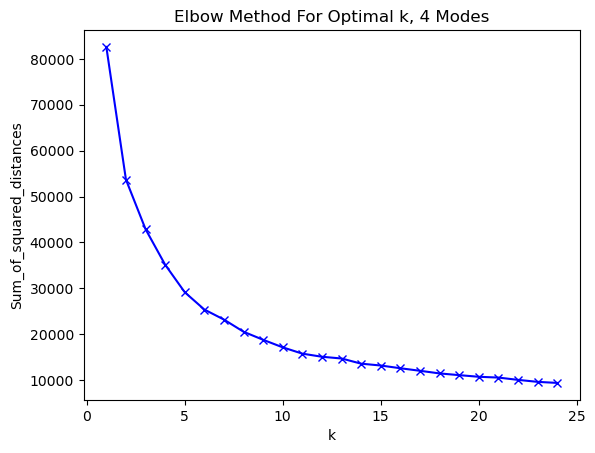

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k, 4 Modes')
plt.show()

## I've determined to use 5 clusters

In [14]:
cluster_numbers = 5
kmeans = KMeans(n_clusters=cluster_numbers, random_state=42)
cluster_labels = kmeans.fit_predict(combined_df_transformed)
cluster_labels

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [15]:
combined_df['Cluster'] = cluster_labels

In [16]:
# combined_df

In [17]:
GLU_PCA = combined_df[combined_df['source'] == 'GLU_PCA'].drop(columns=['source'])
WT_PCA = combined_df[combined_df['source'] == 'WT_PCA'].drop(columns=['source'])


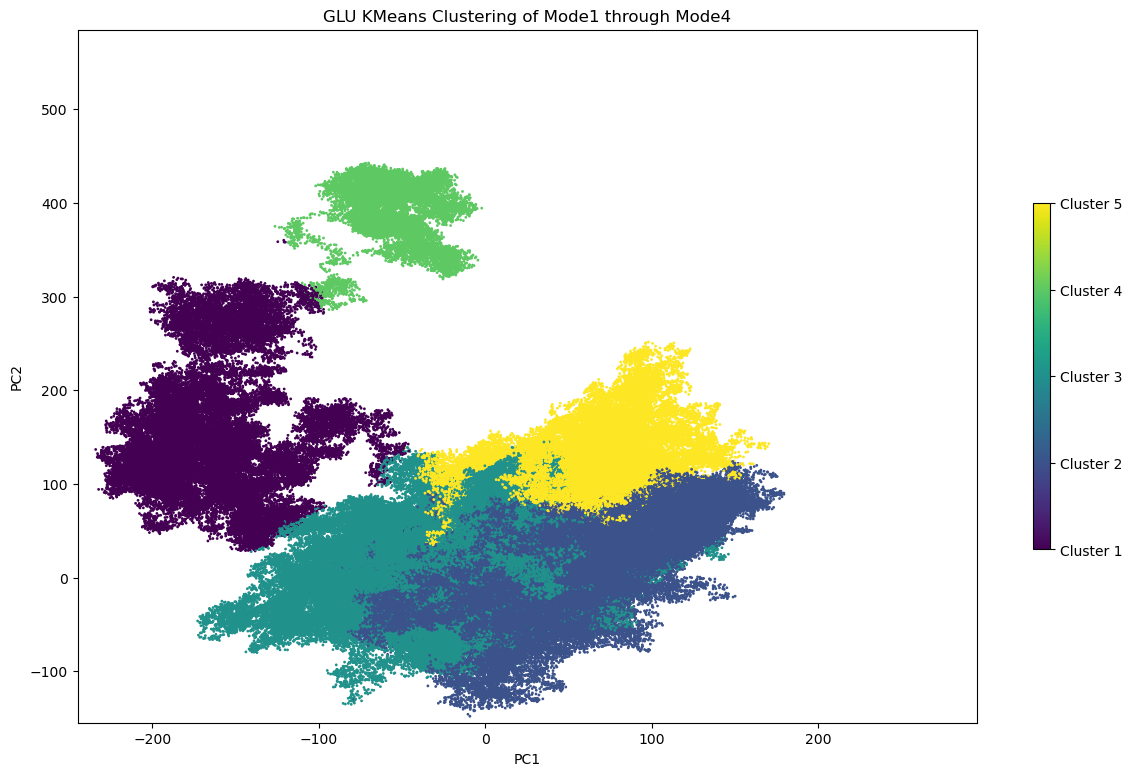

In [20]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(14.5, 9))

scatter = plt.scatter(GLU_PCA['Mode1'], GLU_PCA['Mode2'], c=GLU_PCA['Cluster'], cmap='viridis', marker='o', s=1)
plt.title('GLU KMeans Clustering of Mode1 through Mode4')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.xlim([-245,295])
plt.ylim([-155,585])

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])

# cbar.set_ticks([0, 1])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# plt.grid(True)
plt.show()

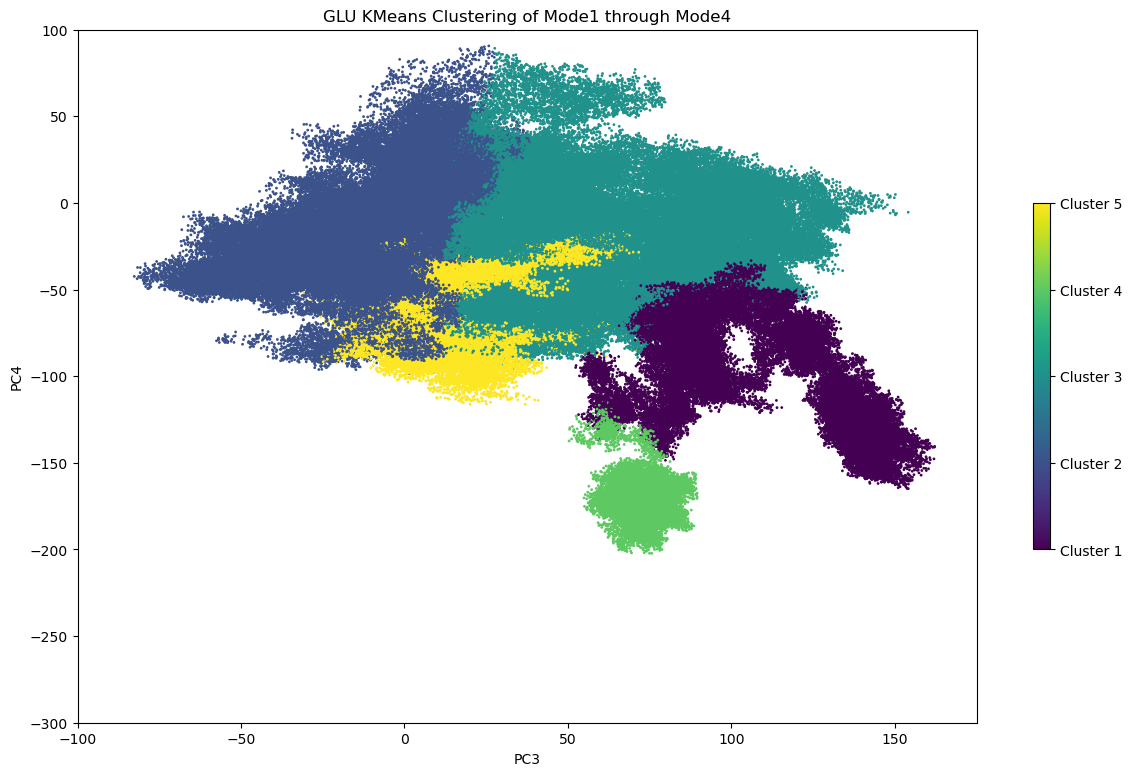

In [21]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(14.5, 9))

scatter = plt.scatter(GLU_PCA['Mode3'], GLU_PCA['Mode4'], c=GLU_PCA['Cluster'], cmap='viridis', marker='o', s=1)
plt.title('GLU KMeans Clustering of Mode1 through Mode4')
plt.xlabel('PC3')
plt.ylabel('PC4')

plt.xlim([-100,175])
plt.ylim([-300,100])

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])

# cbar.set_ticks([0, 1])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# plt.grid(True)
plt.show()

In [22]:
# fig = plt.figure(figsize=(13, 11))
# ax = fig.add_subplot(111, projection='3d')

# # Plot each cluster with a different color
# scatter = ax.scatter(GLU_PCA['Mode1'], GLU_PCA['Mode2'], GLU_PCA['Mode3'], c=GLU_PCA['Cluster'], cmap='viridis', marker='o', s=1)

# plt.title('KMeans Clustering of Mode1 through Mode4')
# ax.set_xlabel('Mode 1')
# ax.set_ylabel('Mode 2')
# ax.set_zlabel('Mode 3')

# cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # # Set the color bar ticks to correspond to cluster labels
# # cbar.set_ticks([0, 1, 2, 3])
# cbar.set_ticks([0, 1, 2, 3, 4])
# # cbar.set_ticks([0, 1, 2])

# cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# # Show the plot
# plt.show()

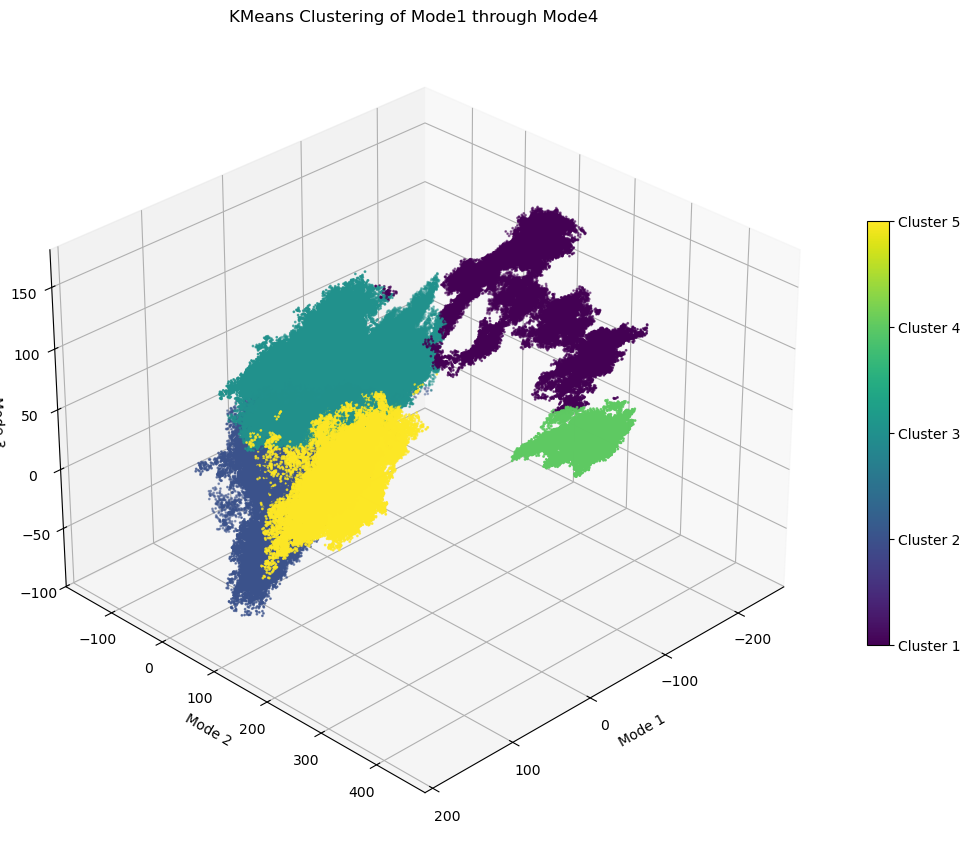

In [23]:
fig = plt.figure(figsize=(13, 11))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=45) #gives me the ability to change the camera viewpoint #https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html

# Plot each cluster with a different color
scatter = ax.scatter(GLU_PCA['Mode1'], GLU_PCA['Mode2'],GLU_PCA['Mode3'], c=GLU_PCA['Cluster'], cmap='viridis', marker='o', s=1)

plt.title('KMeans Clustering of Mode1 through Mode4')
ax.set_xlabel('Mode 1')
ax.set_ylabel('Mode 2')
ax.set_zlabel('Mode 3')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])
# cbar.set_ticks([0, 1, 2])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# Show the plot
plt.show()

In [24]:
# combined_df

In [25]:
# cluster_numbers = 5
# kmeans = KMeans(n_clusters=cluster_numbers, random_state=42)
# cluster_labels_transformed = kmeans.fit_predict(combined_df_transformed)

In [26]:
# combined_df_transformed['Cluster'] = cluster_labels_transformed

In [27]:
WT_PCA.shape

(480000, 12)

### WT

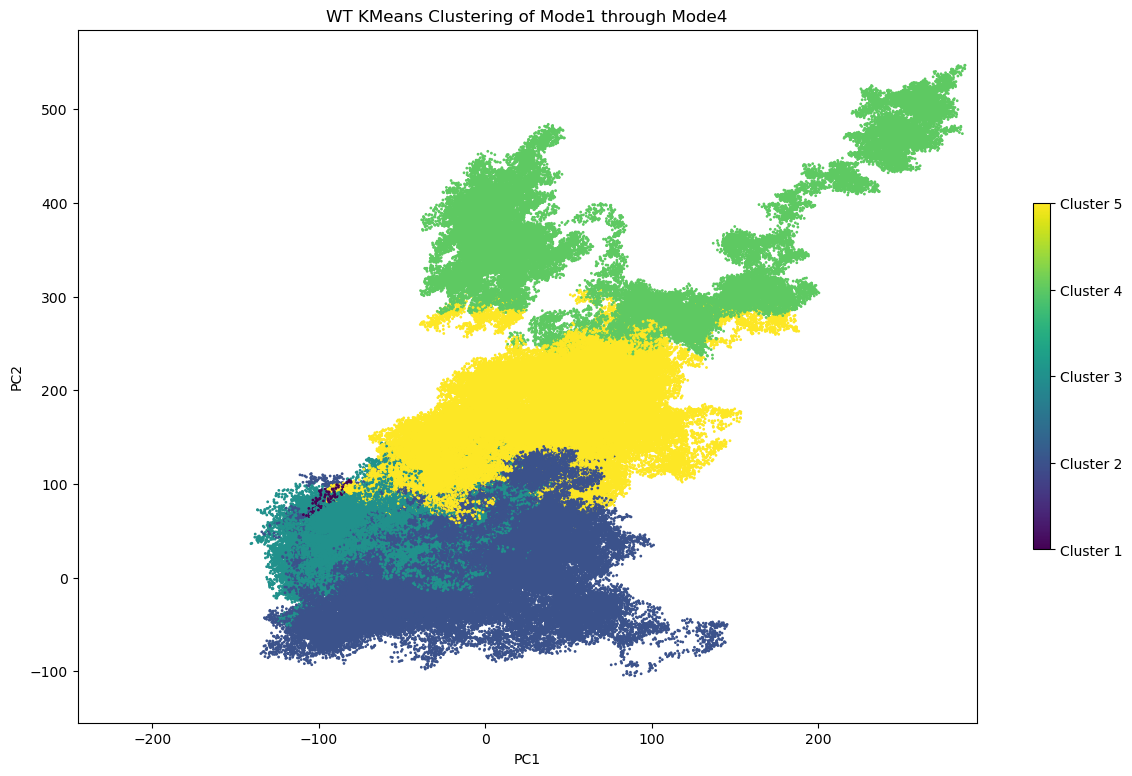

In [28]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(14.5, 9))

scatter = plt.scatter(WT_PCA['Mode1'], WT_PCA['Mode2'], c=WT_PCA['Cluster'], cmap='viridis', marker='o', s=1)
plt.title('WT KMeans Clustering of Mode1 through Mode4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-245,295])
plt.ylim([-155,585])

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# plt.grid(True)
plt.show()

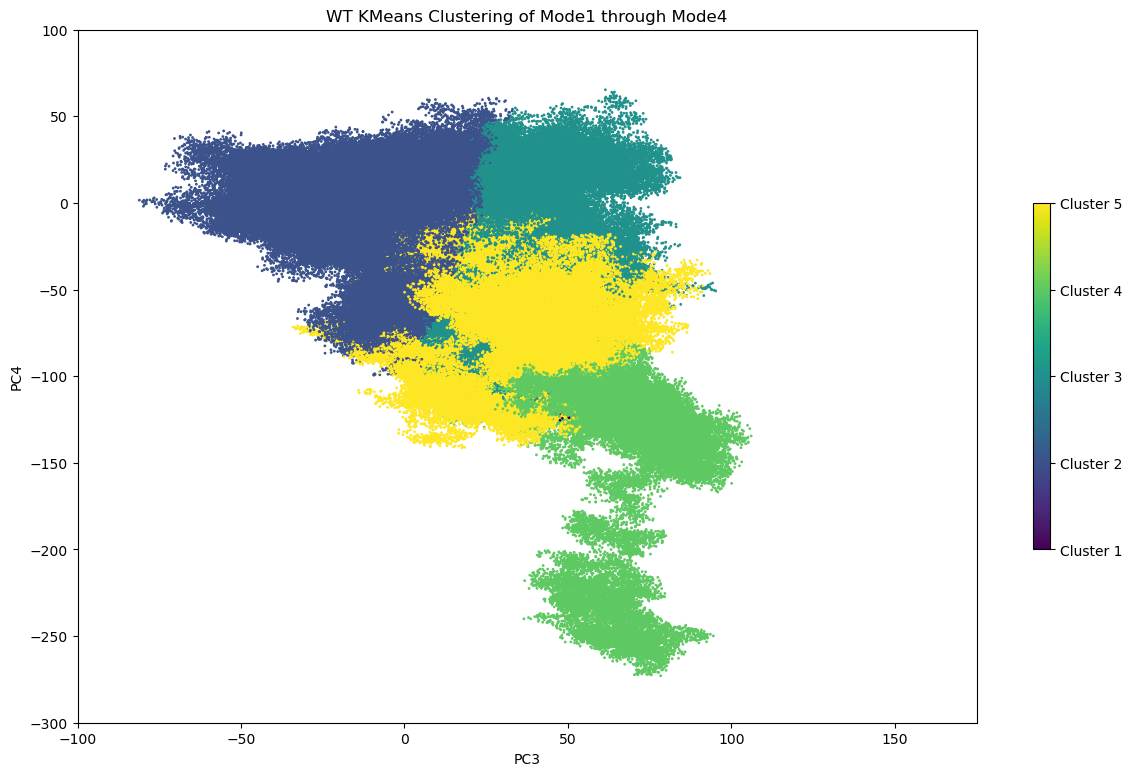

In [29]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(14.5, 9))

scatter = plt.scatter(WT_PCA['Mode3'], WT_PCA['Mode4'], c=WT_PCA['Cluster'], cmap='viridis', marker='o', s=1)
plt.title('WT KMeans Clustering of Mode1 through Mode4')
plt.xlabel('PC3')
plt.ylabel('PC4')

plt.xlim([-100,175])
plt.ylim([-300,100])

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])

# cbar.set_ticks([0, 1])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# plt.grid(True)
plt.show()

In [30]:
# fig = plt.figure(figsize=(13, 11))
# ax = fig.add_subplot(111, projection='3d')

# # Plot each cluster with a different color
# scatter = ax.scatter(WT_PCA['Mode1'], WT_PCA['Mode2'], WT_PCA['Mode3'], c=WT_PCA['Cluster'], cmap='viridis', marker='o', s=1)

# plt.title('WT KMeans Clustering of Mode1 through Mode4')
# ax.set_xlabel('Mode 1')
# ax.set_ylabel('Mode 2')
# ax.set_zlabel('Mode 3')

# cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # # Set the color bar ticks to correspond to cluster labels
# # cbar.set_ticks([0, 1, 2, 3])
# cbar.set_ticks([0, 1, 2, 3, 4])

# cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# # Show the plot
# plt.show()

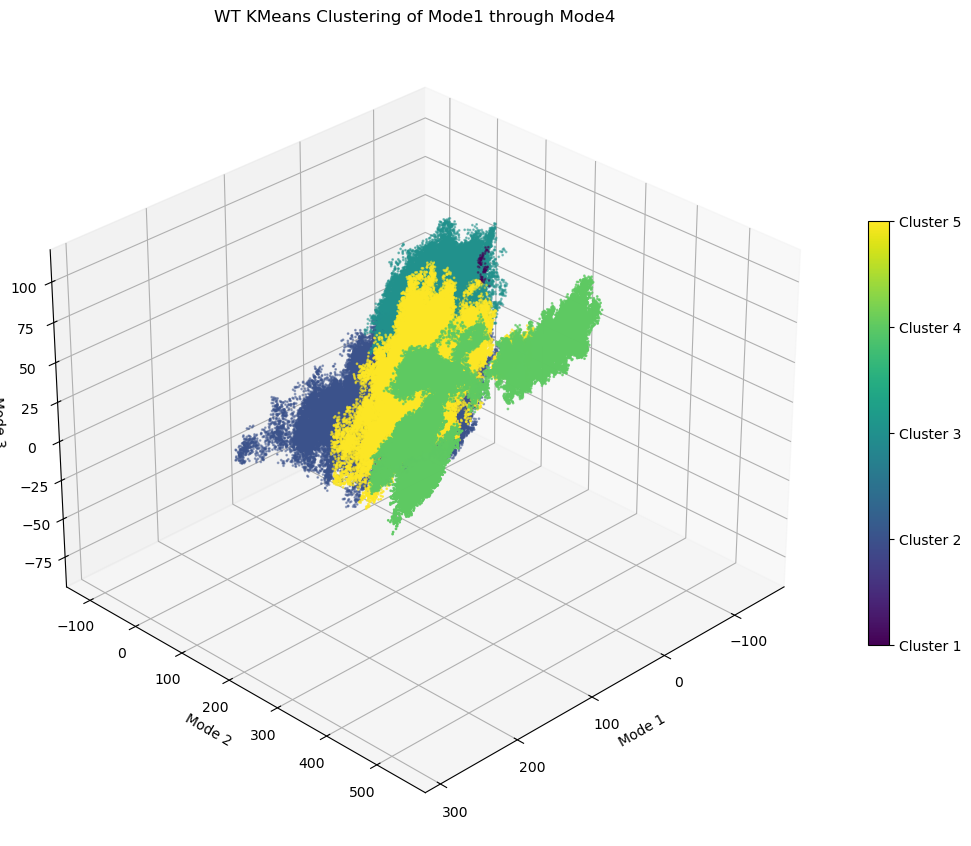

In [31]:
fig = plt.figure(figsize=(13, 11))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=45) #gives me the ability to change the camera viewpoint #https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html

# Plot each cluster with a different color
scatter = ax.scatter(WT_PCA['Mode1'], WT_PCA['Mode2'],WT_PCA['Mode3'], c=WT_PCA['Cluster'], cmap='viridis', marker='o', s=1)

plt.title('WT KMeans Clustering of Mode1 through Mode4')
ax.set_xlabel('Mode 1')
ax.set_ylabel('Mode 2')
ax.set_zlabel('Mode 3')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# Show the plot
plt.show()

## Combined data

In [32]:
# # plt.figure(figsize=(8, 6))
# fig, ax = plt.subplots(figsize=(14.5, 9))


# plt.scatter(GLU_PCA['Mode1'], GLU_PCA['Mode2'], c=GLU_PCA['Cluster'], cmap='viridis', marker='o', s=1)
# scatter = plt.scatter(WT_PCA['Mode1'], WT_PCA['Mode2'], c=WT_PCA['Cluster'], cmap='viridis', marker='o', s=1)
# plt.title('WT and GLU KMeans Clustering of Mode1 through Mode4')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.xlim([-245,295])
# plt.ylim([-155,585])
# cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # # Set the color bar ticks to correspond to cluster labels
# # cbar.set_ticks([0, 1, 2])
# cbar.set_ticks([0, 1, 2, 3, 4])

# cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# # plt.grid(True)
# plt.show()

In [33]:
# fig = plt.figure(figsize=(13, 11))
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=30, azim=45) #gives me the ability to change the camera viewpoint #https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html

# # Plot each cluster with a different color
# ax.scatter(GLU_PCA['Mode1'], GLU_PCA['Mode2'],GLU_PCA['Mode3'], c=GLU_PCA['Cluster'], cmap='viridis', marker='o', s=1)
# scatter = ax.scatter(WT_PCA['Mode1'], WT_PCA['Mode2'],WT_PCA['Mode3'], c=WT_PCA['Cluster'], cmap='viridis', marker='o', s=1)

# plt.title('WT and GLU KMeans Clustering of Mode1 through Mode4')
# ax.set_xlabel('PC 1')
# ax.set_ylabel('PC 2')
# ax.set_zlabel('PC 3')

# cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # # Set the color bar ticks to correspond to cluster labels
# # cbar.set_ticks([0, 1, 2])
# cbar.set_ticks([0, 1, 2, 3, 4])

# cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# # Show the plot
# plt.show()

At this point, I have found the ideal number of clusters to use for the combined data (though this plot changes slightly each time I rerun this). I am going to use 5 clusters and the top four modes. 

In [34]:
# GLU_PCA

In [35]:
# mask = GLU_PCA['Cluster'] == 0
# GLU_Cluster0 = GLU_PCA[mask]

# print(GLU_Cluster0)

# mask = GLU_PCA['Cluster'] == 1
# GLU_Cluster1 = GLU_PCA[mask]

# print(GLU_Cluster1)

# mask = GLU_PCA['Cluster'] == 2
# GLU_Cluster2 = GLU_PCA[mask]

# print(GLU_Cluster2)

# mask = GLU_PCA['Cluster'] == 3
# GLU_Cluster3 = GLU_PCA[mask]

# print(GLU_Cluster3)

# mask = GLU_PCA['Cluster'] == 4
# GLU_Cluster4 = GLU_PCA[mask]

# print(GLU_Cluster4)


# Breaking up the clusters and finding the average structure for each

In [36]:
GLU_grouped = GLU_PCA.groupby(GLU_PCA.Cluster)
GLU_Cluster0 = GLU_grouped.get_group(0)
GLU_Cluster1 = GLU_grouped.get_group(1)
GLU_Cluster2 = GLU_grouped.get_group(2)
GLU_Cluster3 = GLU_grouped.get_group(3)
GLU_Cluster4 = GLU_grouped.get_group(4)

In [37]:
GLU_Cluster0

,#Frame,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9,Mode10,Cluster
219472,219473,-32.669,58.029,122.210,-53.428,2.741,10.045,-30.361,48.983,-22.933,-1.861,0
219475,219476,-30.532,61.596,122.741,-55.203,2.851,13.551,-31.974,53.919,-26.669,-3.470,0
219476,219477,-32.860,59.245,121.745,-55.597,2.694,11.272,-32.101,55.039,-24.016,-4.658,0
219488,219489,-36.856,61.111,119.701,-51.783,3.418,11.668,-35.568,55.007,-27.347,-6.310,0
219491,219492,-39.455,62.778,118.014,-52.221,1.568,10.915,-34.741,54.542,-27.038,-5.219,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359995,359996,-209.431,112.220,133.205,-123.978,-19.098,-6.237,-116.532,16.654,60.248,32.244,0
359996,359997,-211.531,110.861,133.822,-124.552,-19.892,-6.135,-116.680,16.377,59.622,31.932,0
359997,359998,-213.899,115.877,130.906,-120.239,-19.772,-7.054,-115.925,17.090,60.186,33.454,0
359998,359999,-215.317,120.636,132.417,-120.794,-19.734,-5.172,-116.642,15.259,59.431,34.431,0


In [38]:
# GLU_Cluster1

In [39]:
# GLU_Cluster2

In [40]:
# GLU_Cluster3

In [41]:
# GLU_Cluster4

In [42]:
# GLU_Cluster5

In [43]:
print('Number of data points in cluster 0: ', len(GLU_Cluster0.index))
print('Number of data points in cluster 1: ', len(GLU_Cluster1.index))
print('Number of data points in cluster 2: ', len(GLU_Cluster2.index))
print('Number of data points in cluster 3: ', len(GLU_Cluster3.index))
print('Number of data points in cluster 4: ', len(GLU_Cluster4.index))
# print('Number of data points in cluster 5: ', len(GLU_Cluster5.index))
# print('Number of data points in cluster 6: ', len(GLU_Cluster6.index))

Number of data points in cluster 0:  49284
Number of data points in cluster 1:  162633
Number of data points in cluster 2:  183645
Number of data points in cluster 3:  16248
Number of data points in cluster 4:  68190


I have the frame numbers for all of the timesteps in the mdcrd which fall into each of the clusters. From that, I should be able to:
    1) find the average structure for each cluster
    2) find a real structure that is closest to the average 
    3) plot where the average falls on the PCA plot
    4) visualize the structure that is closest to the average in VMD

In [44]:
# GLU_Cluster0["#Frame"]

In [45]:
traj = md.load_netcdf("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/mdcrd/VCBC-A3F_GLU_mut_sims1-8_first300_noBox.mdcrd", 
                          top="/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/VCBC-A3F_GLU_mut_nowat.prmtop")

In [46]:
traj.atom_slice(traj.topology.select('backbone'), inplace=True)

<mdtraj.Trajectory with 480000 frames, 2968 atoms, 742 residues, without unitcells at 0x15540edafec0>

In [47]:
# print(traj.xyz)
# print(len(traj.xyz))

In [48]:
traj.superpose(reference=traj[0])# Align all frames to the first frame

<mdtraj.Trajectory with 480000 frames, 2968 atoms, 742 residues, without unitcells at 0x15540edafec0>

In [49]:
Cluster0Traj = traj.xyz[GLU_Cluster0["#Frame"]-1]
Cluster1Traj = traj.xyz[GLU_Cluster1["#Frame"]-1]
Cluster2Traj = traj.xyz[GLU_Cluster2["#Frame"]-1]
Cluster3Traj = traj.xyz[GLU_Cluster3["#Frame"]-1]
Cluster4Traj = traj.xyz[GLU_Cluster4["#Frame"]-1]
# Cluster5Traj = traj.xyz[GLU_Cluster5["#Frame"]-1]
# Cluster6Traj = traj.xyz[GLU_Cluster6["#Frame"]-1]

In [50]:
Cluster0Traj.shape

(49284, 2968, 3)

In [51]:
print('Number of data points in cluster 0: ', len(GLU_Cluster0.index), "Number in average dataframe:", len(Cluster0Traj) )
print('Number of data points in cluster 1: ', len(GLU_Cluster1.index), "Number in average dataframe:", len(Cluster1Traj) )
print('Number of data points in cluster 2: ', len(GLU_Cluster2.index), "Number in average dataframe:", len(Cluster2Traj) )
print('Number of data points in cluster 3: ', len(GLU_Cluster3.index), "Number in average dataframe:", len(Cluster3Traj) )
print('Number of data points in cluster 4: ', len(GLU_Cluster4.index), "Number in average dataframe:", len(Cluster4Traj) )
# print('Number of data points in cluster 5: ', len(GLU_Cluster5.index), "Number in average dataframe:", len(Cluster5Traj) )
# print('Number of data points in cluster 6: ', len(GLU_Cluster6.index), "Number in average dataframe:", len(Cluster6Traj) )

Number of data points in cluster 0:  49284 Number in average dataframe: 49284
Number of data points in cluster 1:  162633 Number in average dataframe: 162633
Number of data points in cluster 2:  183645 Number in average dataframe: 183645
Number of data points in cluster 3:  16248 Number in average dataframe: 16248
Number of data points in cluster 4:  68190 Number in average dataframe: 68190


In [52]:
# do the same for WT...combine DFs for each cluseter, then come up with average structure using combined

In [53]:
# mask = WT_PCA['Cluster'] == 0
# WT_Cluster = WT_PCA[mask]

# print(WT_Cluster)

# mask = WT_PCA['Cluster'] == 1
# WT_Cluster = WT_PCA[mask]

# print(WT_Cluster)

# mask = WT_PCA['Cluster'] == 2
# WT_Cluster = WT_PCA[mask]

# print(WT_Cluster)

# mask = (WT_PCA)['Cluster'] == 3
# WT_Cluster = WT_PCA[mask]

# print(WT_Cluster)

# mask = (WT_PCA)['Cluster'] == 4
# WT_Cluster = WT_PCA[mask]

# print(WT_Cluster)

In [54]:
WT_grouped = WT_PCA.groupby(WT_PCA.Cluster)

WT_Cluster0 = WT_grouped.get_group(0)
WT_Cluster1 = WT_grouped.get_group(1)
WT_Cluster2 = WT_grouped.get_group(2)
WT_Cluster3 = WT_grouped.get_group(3)
WT_Cluster4 = WT_grouped.get_group(4)

In [55]:
print('Number of data points in cluster 0: ', len(WT_Cluster0.index))
print('Number of data points in cluster 1: ', len(WT_Cluster1.index))
print('Number of data points in cluster 2: ', len(WT_Cluster2.index))
print('Number of data points in cluster 3: ', len(WT_Cluster3.index))
print('Number of data points in cluster 4: ', len(WT_Cluster4.index))


Number of data points in cluster 0:  96
Number of data points in cluster 1:  210087
Number of data points in cluster 2:  89602
Number of data points in cluster 3:  57391
Number of data points in cluster 4:  122824


In [56]:
wt_traj = (md.load_netcdf("/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_sims1-8_first300_noBox.mdcrd", 
                          top="/data/nvanhoorn/A3F_newstructure/VCBC_A3F_GLU_mut/redoing_everything/WT_files/VCBC-A3F_WT_nowat.prmtop"))

In [57]:
wt_traj.atom_slice(wt_traj.topology.select('backbone'), inplace=True)

<mdtraj.Trajectory with 480000 frames, 2968 atoms, 742 residues, without unitcells at 0x15540ed4d4f0>

In [58]:
# wt_traj.superpose(reference=wt_traj[0])# Align all frames to the first frame
wt_traj.superpose(reference=traj)


<mdtraj.Trajectory with 480000 frames, 2968 atoms, 742 residues, without unitcells at 0x15540ed4d4f0>

In [59]:
coordinates = traj.xyz
coordinatesWT = wt_traj.xyz

In [60]:
data_timestepWT = coordinatesWT[0, :, :2]
data_timestepGLU = coordinates[0, :, :2]

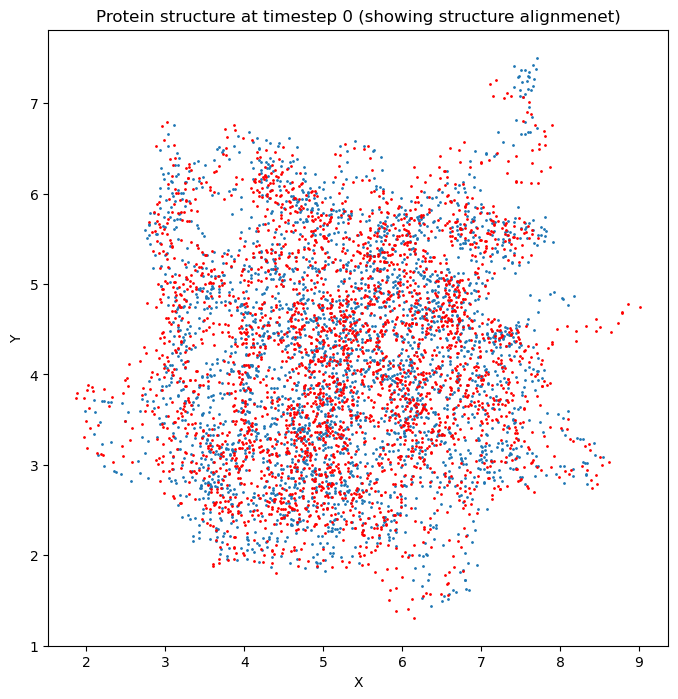

In [61]:
plt.figure(figsize=(8, 8))
plt.scatter(data_timestepWT[:, 0], data_timestepWT[:, 1], s=1)
plt.scatter(data_timestepGLU[:, 0], data_timestepGLU[:, 1], color='r', s=1)

plt.title(f"Protein structure at timestep 0 (showing structure alignmenet)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [62]:
WTCluster0Traj = wt_traj.xyz[WT_Cluster0["#Frame"]-1]
WTCluster1Traj = wt_traj.xyz[WT_Cluster1["#Frame"]-1]
WTCluster2Traj = wt_traj.xyz[WT_Cluster2["#Frame"]-1]
WTCluster3Traj = wt_traj.xyz[WT_Cluster3["#Frame"]-1]
WTCluster4Traj = wt_traj.xyz[WT_Cluster4["#Frame"]-1]


In [63]:
print('Number of data points in cluster 0: ', len(WT_Cluster0.index), "Number in average dataframe:", len(WTCluster0Traj) )
print('Number of data points in cluster 1: ', len(WT_Cluster1.index), "Number in average dataframe:", len(WTCluster1Traj) )
print('Number of data points in cluster 2: ', len(WT_Cluster2.index), "Number in average dataframe:", len(WTCluster2Traj) )
print('Number of data points in cluster 3: ', len(WT_Cluster3.index), "Number in average dataframe:", len(WTCluster3Traj) )
print('Number of data points in cluster 4: ', len(WT_Cluster4.index), "Number in average dataframe:", len(WTCluster4Traj) )

Number of data points in cluster 0:  96 Number in average dataframe: 96
Number of data points in cluster 1:  210087 Number in average dataframe: 210087
Number of data points in cluster 2:  89602 Number in average dataframe: 89602
Number of data points in cluster 3:  57391 Number in average dataframe: 57391
Number of data points in cluster 4:  122824 Number in average dataframe: 122824


In [64]:
# WTCluster0Traj.shape

In [65]:
# Cluster0Traj.shape

In [66]:
combined_Cluster0 = np.concatenate([Cluster0Traj, WTCluster0Traj])
combined_Cluster1 = np.concatenate([Cluster1Traj, WTCluster1Traj])
combined_Cluster2 = np.concatenate([Cluster2Traj, WTCluster2Traj])
combined_Cluster3 = np.concatenate([Cluster3Traj, WTCluster3Traj])
combined_Cluster4 = np.concatenate([Cluster4Traj, WTCluster4Traj])

In [67]:
# combined_Cluster0.shape

In [68]:
average_struct_Cluster0 = np.mean(combined_Cluster0, axis=0)
average_struct_Cluster1 = np.mean(combined_Cluster1, axis=0)
average_struct_Cluster2 = np.mean(combined_Cluster2, axis=0)
average_struct_Cluster3 = np.mean(combined_Cluster3, axis=0)
average_struct_Cluster4 = np.mean(combined_Cluster4, axis=0)


In [69]:
# average_struct_Cluster1.shape

In [70]:
# average_struct_Cluster1

In [71]:
# average_struct_Cluster4

I am now trying to find the frame number that is the lowset RMSD to the average structure for each cluster.

In [72]:
#JUST CONSIDER THE FRAMES THAT ARE WITHIN THAT CLUSTER

# Create a fake trajectory from the average structure (shape: (1, 2968, 3))
average_traj0 = md.Trajectory(average_struct_Cluster0[None, :, :], topology=traj.topology)
average_traj1 = md.Trajectory(average_struct_Cluster1[None, :, :], topology=traj.topology)
average_traj2 = md.Trajectory(average_struct_Cluster2[None, :, :], topology=traj.topology)
average_traj3 = md.Trajectory(average_struct_Cluster3[None, :, :], topology=traj.topology)
average_traj4 = md.Trajectory(average_struct_Cluster4[None, :, :], topology=traj.topology)

# Now calculate RMSD for each frame in the trajectory
rmsd_values0 = md.rmsd(traj[GLU_Cluster0["#Frame"]-1], average_traj0)
rmsd_values1 = md.rmsd(traj[GLU_Cluster1["#Frame"]-1], average_traj1)
rmsd_values2 = md.rmsd(traj[GLU_Cluster2["#Frame"]-1], average_traj2)
rmsd_values3 = md.rmsd(traj[GLU_Cluster3["#Frame"]-1], average_traj3)
rmsd_values4 = md.rmsd(traj[GLU_Cluster4["#Frame"]-1], average_traj4)

# Find the frame with the minimum RMSD value for each cluster
closest_frame0_index = np.argmin(rmsd_values0)
closest_frame1_index = np.argmin(rmsd_values1)
closest_frame2_index = np.argmin(rmsd_values2)
closest_frame3_index = np.argmin(rmsd_values3)
closest_frame4_index = np.argmin(rmsd_values4)


In [73]:
rmsd_values0.shape

(49284,)

In [74]:
closest_frame0_index

44854

In [75]:
GLU_Cluster0.shape

(49284, 12)

In [76]:
# Map the indices of the minimum RMSD values to the corresponding frame numbers
closest_frame0 = GLU_Cluster0.iloc[closest_frame0_index]["#Frame"]
closest_frame1 = GLU_Cluster1.iloc[closest_frame1_index]["#Frame"]
closest_frame2 = GLU_Cluster2.iloc[closest_frame2_index]["#Frame"]
closest_frame3 = GLU_Cluster3.iloc[closest_frame3_index]["#Frame"]
closest_frame4 = GLU_Cluster4.iloc[closest_frame4_index]["#Frame"]


# closest_frame1 = GLU_Cluster1["#Frame"][closest_frame1_index]  # Get the actual frame number from GLU_Cluster1
# closest_frame2 = GLU_Cluster2["#Frame"][closest_frame2_index]  # Get the actual frame number from GLU_Cluster2
# closest_frame3 = GLU_Cluster3["#Frame"][closest_frame3_index]  # Get the actual frame number from GLU_Cluster3
# closest_frame4 = GLU_Cluster4["#Frame"][closest_frame4_index]  # Get the actual frame number from GLU_Cluster4

In [77]:
# Create a fake trajectory from the average structure (shape: (1, 2968, 3))
WTaverage_traj0 = md.Trajectory(average_struct_Cluster0[None, :, :], topology=wt_traj.topology)
WTaverage_traj1 = md.Trajectory(average_struct_Cluster1[None, :, :], topology=wt_traj.topology)
WTaverage_traj2 = md.Trajectory(average_struct_Cluster2[None, :, :], topology=wt_traj.topology)
WTaverage_traj3 = md.Trajectory(average_struct_Cluster3[None, :, :], topology=wt_traj.topology)
WTaverage_traj4 = md.Trajectory(average_struct_Cluster4[None, :, :], topology=wt_traj.topology)

# Now calculate RMSD for each frame in the trajectory
WTrmsd_values0 = md.rmsd(wt_traj[WT_Cluster0["#Frame"]-1], WTaverage_traj0)
WTrmsd_values1 = md.rmsd(wt_traj[WT_Cluster1["#Frame"]-1], WTaverage_traj1)
WTrmsd_values2 = md.rmsd(wt_traj[WT_Cluster2["#Frame"]-1], WTaverage_traj2)
WTrmsd_values3 = md.rmsd(wt_traj[WT_Cluster3["#Frame"]-1], WTaverage_traj3)
WTrmsd_values4 = md.rmsd(wt_traj[WT_Cluster4["#Frame"]-1], WTaverage_traj4)

# Find the frame with the minimum RMSD value for each cluster
WTclosest_frame0_index = np.argmin(WTrmsd_values0)
WTclosest_frame1_index = np.argmin(WTrmsd_values1)
WTclosest_frame2_index = np.argmin(WTrmsd_values2)
WTclosest_frame3_index = np.argmin(WTrmsd_values3)
WTclosest_frame4_index = np.argmin(WTrmsd_values4)

WTclosest_frame0 = WT_Cluster0.iloc[WTclosest_frame0_index]["#Frame"]
WTclosest_frame1 = WT_Cluster1.iloc[WTclosest_frame1_index]["#Frame"]
WTclosest_frame2 = WT_Cluster2.iloc[WTclosest_frame2_index]["#Frame"]
WTclosest_frame3 = WT_Cluster3.iloc[WTclosest_frame3_index]["#Frame"]
WTclosest_frame4 = WT_Cluster4.iloc[WTclosest_frame4_index]["#Frame"]

In [78]:
WTrmsd_values0

array([0.60539937, 0.5981206 , 0.58417004, 0.57469606, 0.58653086,
       0.5809507 , 0.578542  , 0.56565684, 0.57534605, 0.56740385,
       0.5793468 , 0.57928544, 0.5877145 , 0.59098834, 0.59602433,
       0.6008517 , 0.6077665 , 0.5736279 , 0.57190675, 0.59314674,
       0.5797828 , 0.572199  , 0.5580485 , 0.5560426 , 0.5592053 ,
       0.56453425, 0.57188606, 0.56596625, 0.56115067, 0.5823671 ,
       0.57326984, 0.5683448 , 0.5934795 , 0.5926784 , 0.58919287,
       0.58692795, 0.59887487, 0.5844628 , 0.5923563 , 0.5733203 ,
       0.56981105, 0.57341444, 0.57423556, 0.5740636 , 0.5674897 ,
       0.5617601 , 0.564779  , 0.56150705, 0.55904055, 0.5575979 ,
       0.55760735, 0.5552775 , 0.55139345, 0.5432779 , 0.5307295 ,
       0.5374862 , 0.5408353 , 0.54081345, 0.52878916, 0.5502896 ,
       0.54671675, 0.5283186 , 0.5385601 , 0.5293464 , 0.5302581 ,
       0.52134466, 0.5238756 , 0.5166966 , 0.5262669 , 0.52432007,
       0.5131848 , 0.52156675, 0.5214835 , 0.5153729 , 0.51861

In [79]:
WTclosest_frame0

419648.0

In [80]:
print(f"The closest frame to the average structure for Cluster 0 is frame {closest_frame0} with RMSD = {rmsd_values0[closest_frame0_index]:.3f}")
print(f"The closest frame to the average structure for Cluster 1 is frame {closest_frame1} with RMSD = {rmsd_values1[closest_frame1_index]:.3f}")
print(f"The closest frame to the average structure for Cluster 2 is frame {closest_frame2} with RMSD = {rmsd_values2[closest_frame2_index]:.3f}")
print(f"The closest frame to the average structure for Cluster 3 is frame {closest_frame3} with RMSD = {rmsd_values3[closest_frame3_index]:.3f}")
print(f"The closest frame to the average structure for Cluster 4 is frame {closest_frame4} with RMSD = {rmsd_values4[closest_frame4_index]:.3f}")

print()
print(f"The closest frame to the average structure is frame {WTclosest_frame0} with RMSD = {WTrmsd_values0[WTclosest_frame0_index]:.3f}")
print(f"The closest frame to the average structure is frame {WTclosest_frame1} with RMSD = {WTrmsd_values1[WTclosest_frame1_index]:.3f}")
print(f"The closest frame to the average structure is frame {WTclosest_frame2} with RMSD = {WTrmsd_values2[WTclosest_frame2_index]:.3f}")
print(f"The closest frame to the average structure is frame {WTclosest_frame3} with RMSD = {WTrmsd_values3[WTclosest_frame3_index]:.3f}")
print(f"The closest frame to the average structure is frame {WTclosest_frame4} with RMSD = {WTrmsd_values4[WTclosest_frame4_index]:.3f}")

The closest frame to the average structure for Cluster 0 is frame 355571.0 with RMSD = 0.158
The closest frame to the average structure for Cluster 1 is frame 305874.0 with RMSD = 0.216
The closest frame to the average structure for Cluster 2 is frame 305259.0 with RMSD = 0.226
The closest frame to the average structure for Cluster 3 is frame 295244.0 with RMSD = 0.268
The closest frame to the average structure for Cluster 4 is frame 76440.0 with RMSD = 0.233

The closest frame to the average structure is frame 419648.0 with RMSD = 0.501
The closest frame to the average structure is frame 181075.0 with RMSD = 0.210
The closest frame to the average structure is frame 426925.0 with RMSD = 0.267
The closest frame to the average structure is frame 177305.0 with RMSD = 0.213
The closest frame to the average structure is frame 338803.0 with RMSD = 0.242


In [81]:
traj.xyz.shape

(480000, 2968, 3)

In [82]:
# cluster 0: GLU frame 355571.0
# cluster 1: WT frame 181075.0
# cluster 2: GLU frame 305259.0
# cluster 3: WT frame 177305.0
# cluster 4: GLU frame 338803.0

In [83]:
min_rmsd_frame_data0 = GLU_PCA[GLU_PCA['#Frame'] == closest_frame0]
min_rmsd_frame_data1 = WT_PCA[WT_PCA['#Frame'] == WTclosest_frame1]
min_rmsd_frame_data2 = GLU_PCA[GLU_PCA['#Frame'] == closest_frame2]
min_rmsd_frame_data3 = WT_PCA[WT_PCA['#Frame'] == WTclosest_frame3]
min_rmsd_frame_data4 = GLU_PCA[GLU_PCA['#Frame'] == closest_frame4]

In [84]:
min_rmsd_frame_data1

,#Frame,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9,Mode10,Cluster
181074,181075,3.559,13.795,-16.997,-3.632,-1.548,27.051,-17.506,-12.567,-4.086,-15.479,1


At this point, I think I've found the average structure for each of the clusters. Now I'm trying to plot the average structure locations as Xs on the cluster PCA plot

In [85]:
min_rmsd_frame_data0

,#Frame,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9,Mode10,Cluster
355570,355571,-224.551,94.137,130.951,-112.412,-23.426,-5.886,-111.457,10.922,56.978,43.266,0


In [86]:
min_rmsd_frame_data2

,#Frame,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9,Mode10,Cluster
305258,305259,2.214,13.89,23.618,-25.526,-21.895,8.674,1.119,-1.777,0.396,-6.567,2


In [87]:
min_rmsd_frame_data3

,#Frame,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9,Mode10,Cluster
177304,177305,3.352,290.047,51.84,-79.992,-28.303,73.845,-22.738,125.155,-35.001,17.389,3


In [88]:
min_rmsd_frame_data4

,#Frame,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9,Mode10,Cluster
76439,76440,17.996,93.789,26.504,-46.589,-14.155,37.447,-27.608,44.333,-13.837,-3.664,4


In [89]:
# min_rmsd_frame_data5

## Recreating cluster figures with cluster averages shown

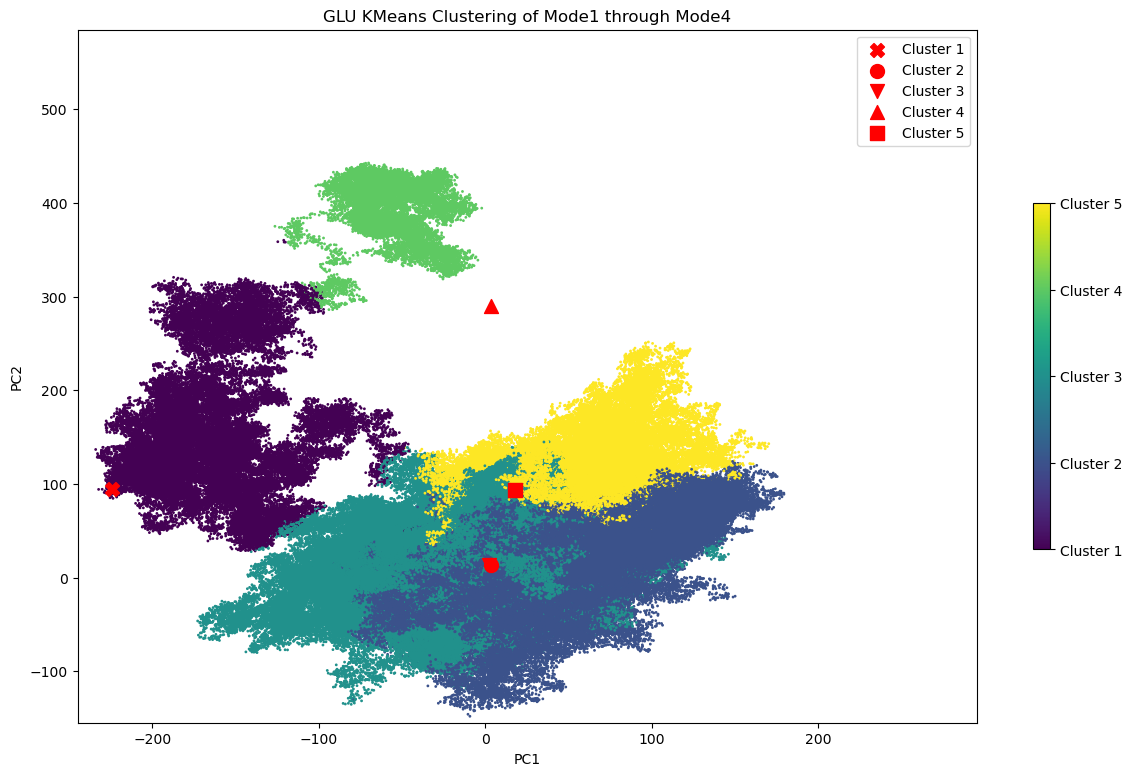

In [90]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(14.5, 9))

scatter = plt.scatter(GLU_PCA['Mode1'], GLU_PCA['Mode2'], c=GLU_PCA['Cluster'], cmap='viridis', marker='o', s=1)

plt.scatter(min_rmsd_frame_data0['Mode1'], min_rmsd_frame_data0['Mode2'], color='red', marker='X', s=100, label=f"Cluster 1")
plt.scatter(min_rmsd_frame_data1['Mode1'], min_rmsd_frame_data1['Mode2'], color='red', marker='o', s=100, label=f"Cluster 2")
plt.scatter(min_rmsd_frame_data2['Mode1'], min_rmsd_frame_data2['Mode2'], color='red', marker='v', s=100, label=f"Cluster 3")
plt.scatter(min_rmsd_frame_data3['Mode1'], min_rmsd_frame_data3['Mode2'], color='red', marker='^', s=100, label=f"Cluster 4")
plt.scatter(min_rmsd_frame_data4['Mode1'], min_rmsd_frame_data4['Mode2'], color='red', marker='s', s=100, label=f"Cluster 5")

plt.title('GLU KMeans Clustering of Mode1 through Mode4')
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])
plt.legend()
plt.xlim([-245,295])
plt.ylim([-155,585])

# cbar.set_ticks([0, 1])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# plt.grid(True)
plt.show()

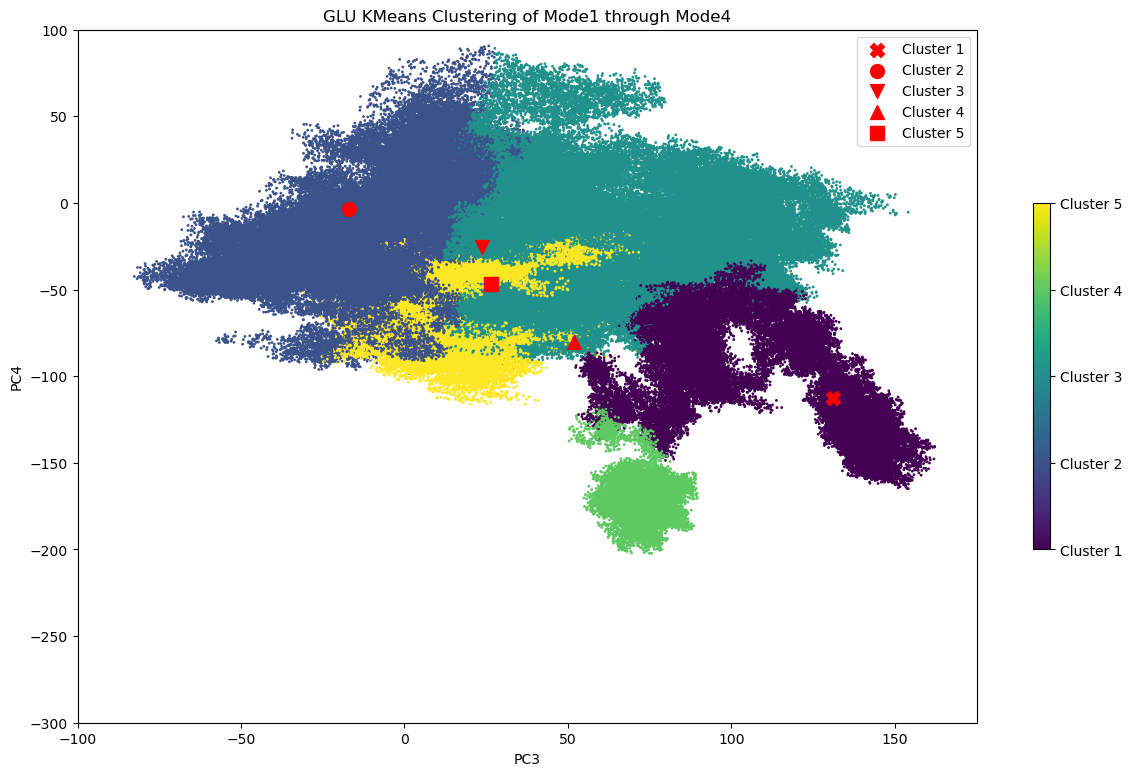

In [91]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(14.5, 9))

scatter = plt.scatter(GLU_PCA['Mode3'], GLU_PCA['Mode4'], c=GLU_PCA['Cluster'], cmap='viridis', marker='o', s=1)

plt.scatter(min_rmsd_frame_data0['Mode3'], min_rmsd_frame_data0['Mode4'], color='red', marker='X', s=100, label=f"Cluster 1")
plt.scatter(min_rmsd_frame_data1['Mode3'], min_rmsd_frame_data1['Mode4'], color='red', marker='o', s=100, label=f"Cluster 2")
plt.scatter(min_rmsd_frame_data2['Mode3'], min_rmsd_frame_data2['Mode4'], color='red', marker='v', s=100, label=f"Cluster 3")
plt.scatter(min_rmsd_frame_data3['Mode3'], min_rmsd_frame_data3['Mode4'], color='red', marker='^', s=100, label=f"Cluster 4")
plt.scatter(min_rmsd_frame_data4['Mode3'], min_rmsd_frame_data4['Mode4'], color='red', marker='s', s=100, label=f"Cluster 5")

plt.title('GLU KMeans Clustering of Mode1 through Mode4')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.xlim([-100,175])
plt.ylim([-300,100])
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])
plt.legend()

# cbar.set_ticks([0, 1])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# plt.grid(True)
plt.show()

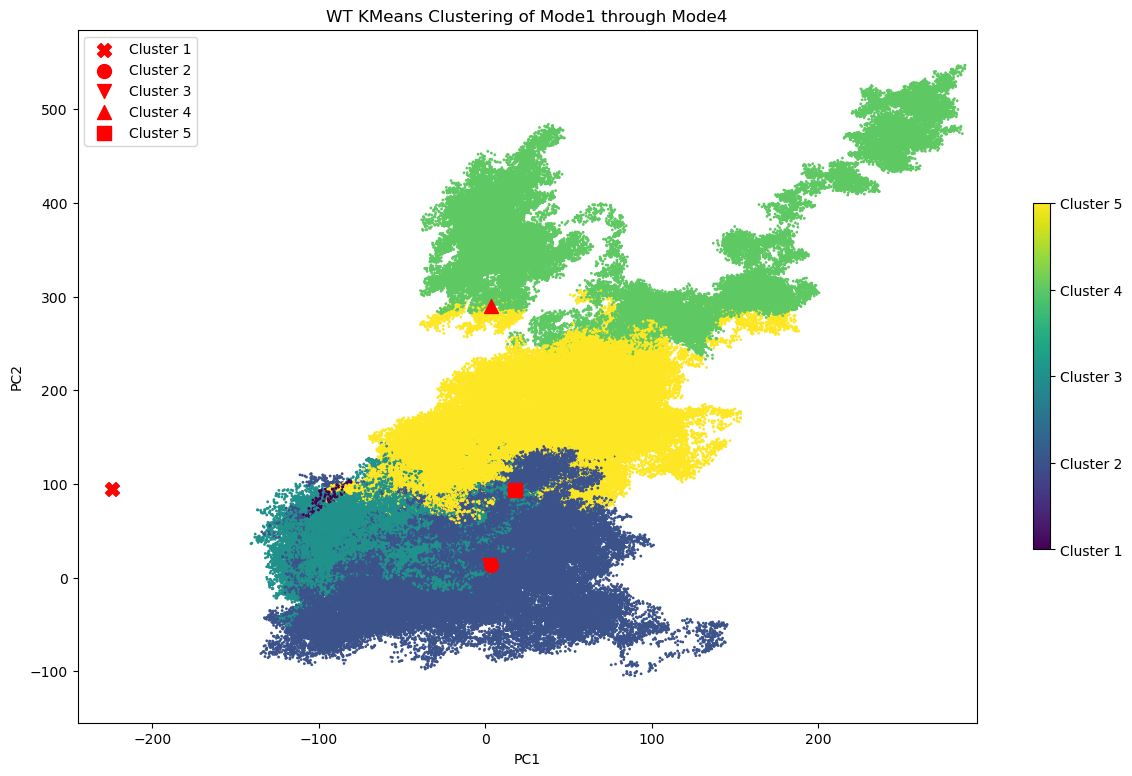

In [92]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(14.5, 9))

scatter = plt.scatter(WT_PCA['Mode1'], WT_PCA['Mode2'], c=WT_PCA['Cluster'], cmap='viridis', marker='o', s=1)

plt.scatter(min_rmsd_frame_data0['Mode1'], min_rmsd_frame_data0['Mode2'], color='red', marker='X', s=100, label=f"Cluster 1")
plt.scatter(min_rmsd_frame_data1['Mode1'], min_rmsd_frame_data1['Mode2'], color='red', marker='o', s=100, label=f"Cluster 2")
plt.scatter(min_rmsd_frame_data2['Mode1'], min_rmsd_frame_data2['Mode2'], color='red', marker='v', s=100, label=f"Cluster 3")
plt.scatter(min_rmsd_frame_data3['Mode1'], min_rmsd_frame_data3['Mode2'], color='red', marker='^', s=100, label=f"Cluster 4")
plt.scatter(min_rmsd_frame_data4['Mode1'], min_rmsd_frame_data4['Mode2'], color='red', marker='s', s=100, label=f"Cluster 5")

plt.title('WT KMeans Clustering of Mode1 through Mode4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-245,295])
plt.ylim([-155,585])
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])
plt.legend()

# cbar.set_ticks([0, 1])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# plt.grid(True)
plt.show()

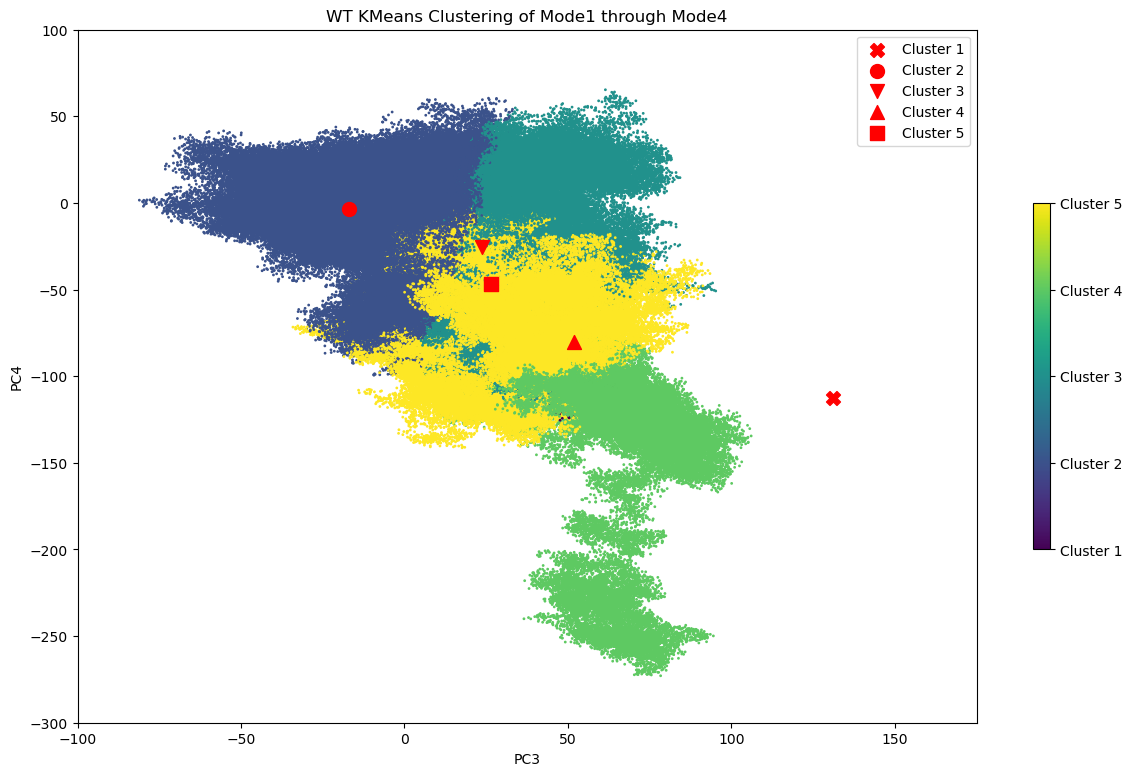

In [93]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(14.5, 9))

scatter = plt.scatter(WT_PCA['Mode3'], WT_PCA['Mode4'], c=WT_PCA['Cluster'], cmap='viridis', marker='o', s=1)

plt.scatter(min_rmsd_frame_data0['Mode3'], min_rmsd_frame_data0['Mode4'], color='red', marker='X', s=100, label=f"Cluster 1")
plt.scatter(min_rmsd_frame_data1['Mode3'], min_rmsd_frame_data1['Mode4'], color='red', marker='o', s=100, label=f"Cluster 2")
plt.scatter(min_rmsd_frame_data2['Mode3'], min_rmsd_frame_data2['Mode4'], color='red', marker='v', s=100, label=f"Cluster 3")
plt.scatter(min_rmsd_frame_data3['Mode3'], min_rmsd_frame_data3['Mode4'], color='red', marker='^', s=100, label=f"Cluster 4")
plt.scatter(min_rmsd_frame_data4['Mode3'], min_rmsd_frame_data4['Mode4'], color='red', marker='s', s=100, label=f"Cluster 5")

plt.title('WT KMeans Clustering of Mode1 through Mode4')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.xlim([-100,175])
plt.ylim([-300,100])
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])
plt.legend()

# cbar.set_ticks([0, 1])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# plt.grid(True)
plt.show()

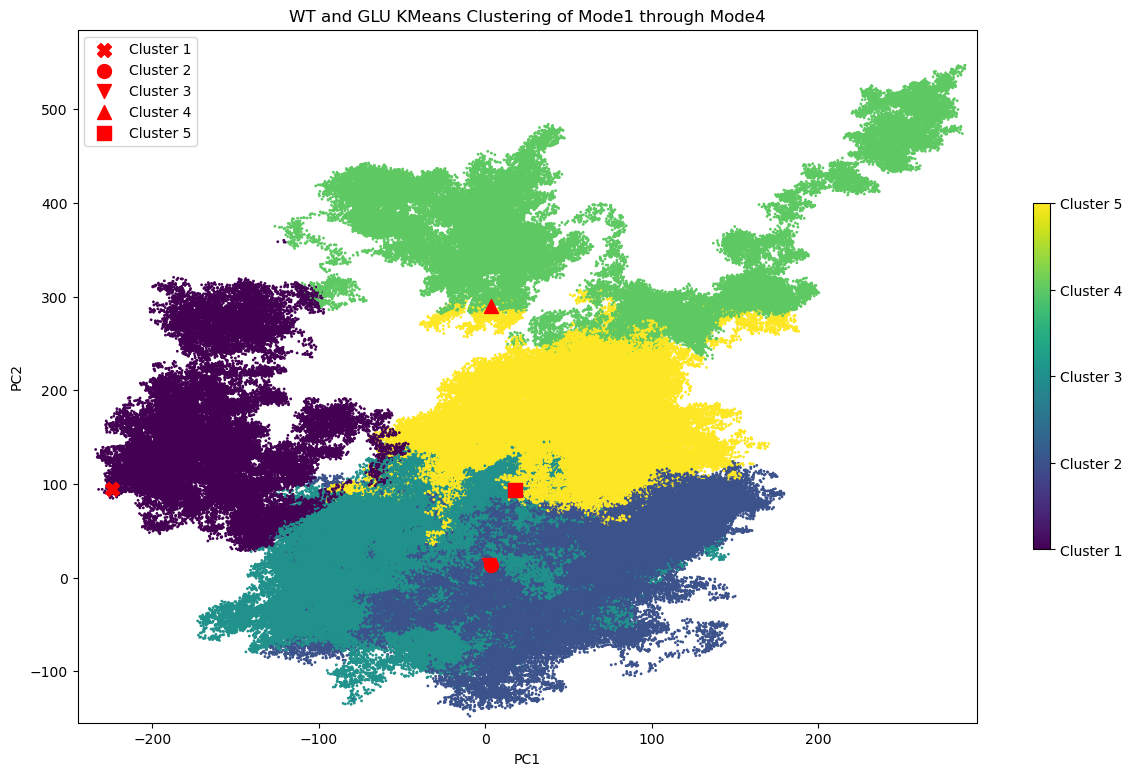

In [94]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(14.5, 9))

scatter = plt.scatter(WT_PCA['Mode1'], WT_PCA['Mode2'], c=WT_PCA['Cluster'], cmap='viridis', marker='o', s=1)
scatter = plt.scatter(GLU_PCA['Mode1'], GLU_PCA['Mode2'], c=GLU_PCA['Cluster'], cmap='viridis', marker='o', s=1)


plt.scatter(min_rmsd_frame_data0['Mode1'], min_rmsd_frame_data0['Mode2'], color='red', marker='X', s=100, label=f"Cluster 1")
plt.scatter(min_rmsd_frame_data1['Mode1'], min_rmsd_frame_data1['Mode2'], color='red', marker='o', s=100, label=f"Cluster 2")
plt.scatter(min_rmsd_frame_data2['Mode1'], min_rmsd_frame_data2['Mode2'], color='red', marker='v', s=100, label=f"Cluster 3")
plt.scatter(min_rmsd_frame_data3['Mode1'], min_rmsd_frame_data3['Mode2'], color='red', marker='^', s=100, label=f"Cluster 4")
plt.scatter(min_rmsd_frame_data4['Mode1'], min_rmsd_frame_data4['Mode2'], color='red', marker='s', s=100, label=f"Cluster 5")

plt.title('WT and GLU KMeans Clustering of Mode1 through Mode4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-245,295])
plt.ylim([-155,585])
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])
plt.legend()

# cbar.set_ticks([0, 1])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# plt.grid(True)
plt.show()

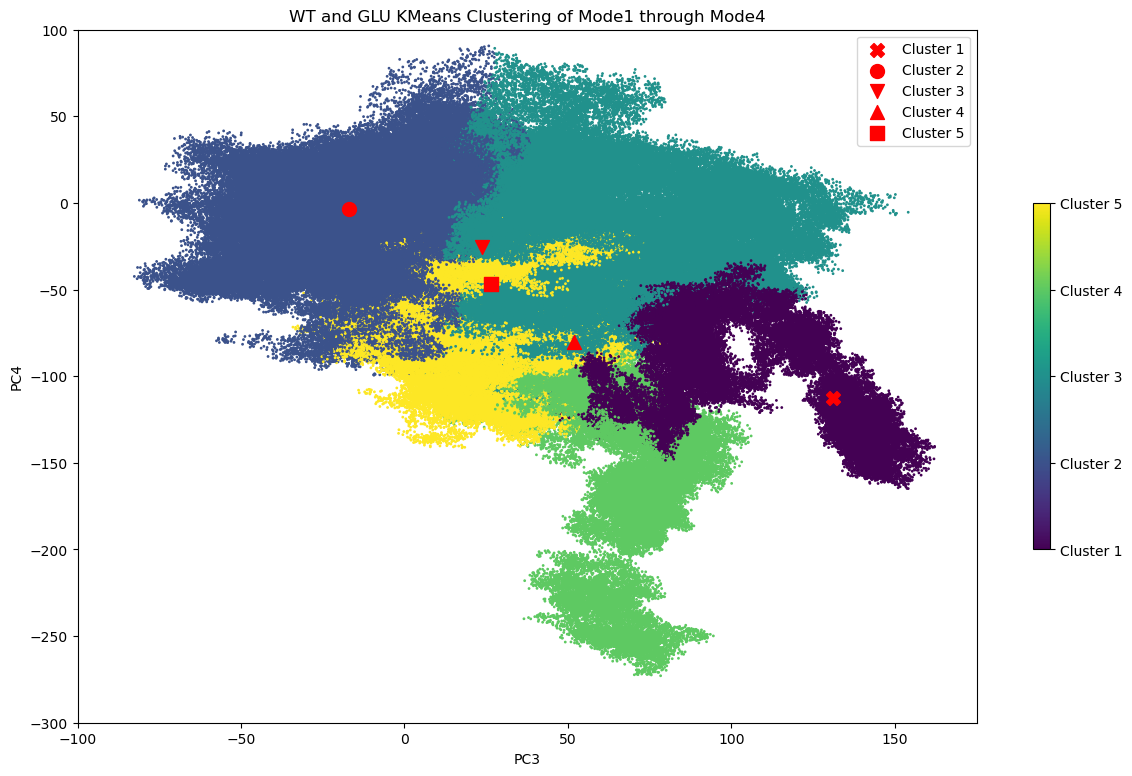

In [95]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(14.5, 9))

scatter = plt.scatter(WT_PCA['Mode3'], WT_PCA['Mode4'], c=WT_PCA['Cluster'], cmap='viridis', marker='o', s=1)
scatter = plt.scatter(GLU_PCA['Mode3'], GLU_PCA['Mode4'], c=GLU_PCA['Cluster'], cmap='viridis', marker='o', s=1)


plt.scatter(min_rmsd_frame_data0['Mode3'], min_rmsd_frame_data0['Mode4'], color='red', marker='X', s=100, label=f"Cluster 1")
plt.scatter(min_rmsd_frame_data1['Mode3'], min_rmsd_frame_data1['Mode4'], color='red', marker='o', s=100, label=f"Cluster 2")
plt.scatter(min_rmsd_frame_data2['Mode3'], min_rmsd_frame_data2['Mode4'], color='red', marker='v', s=100, label=f"Cluster 3")
plt.scatter(min_rmsd_frame_data3['Mode3'], min_rmsd_frame_data3['Mode4'], color='red', marker='^', s=100, label=f"Cluster 4")
plt.scatter(min_rmsd_frame_data4['Mode3'], min_rmsd_frame_data4['Mode4'], color='red', marker='s', s=100, label=f"Cluster 5")

plt.title('WT and GLU KMeans Clustering of Mode1 through Mode4')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.xlim([-100,175])
plt.ylim([-300,100])
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
# # Set the color bar ticks to correspond to cluster labels
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticks([0, 1, 2, 3, 4])
plt.legend()

# cbar.set_ticks([0, 1])

cbar.set_ticklabels([f'Cluster {i+1}' for i in range(cluster_numbers)])

# plt.grid(True)
plt.show()